In [4]:
import sys
import os
import pandas as pd
###There is something you need to change before using
# change the path where jupyter access
Path=r'C:\Users\Simu\Desktop\BRISTOL\DSMP'
#where change the path of data in "additional folder"
path_add_folder=r'C:\Users\Simu\Desktop\BRISTOL\DSMP\925 Data additional data'
#where change the path of data in "Rise data"
path_rise_folder=r'C:\Users\Simu\Desktop\BRISTOL\DSMP\Ceara Rise data'
sys.path.append(Path)
#merge name of excel into list files
files_add = [file for file in os.listdir(path_add_folder) 
             if file.endswith('.csv') or file.endswith('.xlsx')]
files_rise = [file for file in os.listdir(path_rise_folder) 
             if file.endswith('.csv') or file.endswith('.xlsx')]
def read_all_excel_from_folder(path,files):
    #initialize a library to storage
    list=[]
    for file in files:
        #join the path of excel to the path of folder
        file_path = os.path.join(path,file)
        #get data with panda
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
        else:
            df = pd.read_excel(file_path)
        #get name of excel without exthension
        file_name_without_extension = os.path.splitext(file)[0]
        #storage data in library with name of excel to index
        list.append(df)
    return list

##storage data from additon_folder
excels_add= read_all_excel_from_folder(path_add_folder,files_add)
#example of indexing
print(excels_add[0])
#because the name of excel is complex so we read the name of file with number
#but it is ok to index with(excel_add[files_add.index('name')])
print(excels_add[files_add.index(files_add[0])])

##storage fata from rise_folder
excels_rise= read_all_excel_from_folder(path_rise_folder,files_rise)
print(excels_rise[0])


      Unnamed: 0  Object.ID    Area..µm².  Mean..Gray.Intensity.Value.  \
0              1         10  71960.336636                   115.860406   
1              2         11  71012.345738                   102.445560   
2              3         12  43433.638042                   139.667000   
3              4         13  47138.629994                   115.107011   
4              5         14  48938.942984                   141.558024   
...          ...        ...           ...                          ...   
2154        2155       7211  39328.576537                    97.571650   
2155        2156       7272  28596.275908                   120.901156   
2156        2157       7287  64680.810196                   132.147640   
2157        2158       7288  45233.951033                   123.688137   
2158        2159       7629  79779.087257                   166.323558   

      Shape.Factor  Min..Diameter...µm.  Max..Diameter...µm.  \
0         0.662955           246.498520        

In [3]:
pip install openpyxl


   ---------------------------------------- 250.9/250.9 kB 7.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


    ***I will change name of columns to make sure every excel have same columns , take out blank columns identified by panda and take out last three lines in excel of file"rise" because they are not data about specific samples(you can see why in details by opening excels in 'rise' file)
    add columns in excel which miss "area" and "Perimeter (µm)"
    rearrange columns by letters
    rename colimns
    add columns for indexing age

In [7]:
import re
#get value of attributes from filenames
def pre_filenames(filenames):
    name_attribute = []
    for filename in filenames:
        # take out extension and "measure ...."
        filename = os.path.splitext(filename)[0]
        filename = filename.replace("Count and Measure of", "").strip()
        # get elements of number and letter
        elements = re.findall(r'\d+\.\d+|\d+|[a-zA-Z]', filename)
        # take out "-"
        parsed_elements=[]
        for element in elements:
            parsed_elements.extend(re.split(r'[-]', element))
            
        while len(parsed_elements) < 7:
            parsed_elements.append(None)  # Fill with `None` if missing

        name_attribute.append(parsed_elements)
    return name_attribute
# function to reneme columns
def rename_columns(excels):
    new_columns = ['Area (µm²)', 
                   'Elongation', 
                   'Max (Diameter) (µm)',
                   'Mean (Diameter) (µm)', 
                   'Mean (Gray Intensity Value)',
                   'Min (Diameter) (µm)', 
                   'Object ID', 
                   'Perimeter (µm)', 
                   'Shape Factor',
                   'Sphericity']
    excels = [excel.rename(columns=dict(zip(excel.columns,new_columns))) for excel in excels]
    return excels
def add_columns(excels,name_lists):
    excels=[excel.assign(
        SITE = name[0],
        HOLE = name[1],
        CORE = name[2],
        CORE_TYPE=name[3],
        SECTION=name[4],
        TOP_DEPTH=name[5],
        BOTTOM_DEPTH=name[6]
        ) for excel,name in zip(excels,name_lists)]
    return excels

def drop_columns(excels,columns_name):
    return [df.drop(columns=[columns_name], errors='ignore') for df in excels]

#get name of files
pre_filenames_add=pre_filenames(files_add)
#print(pre_filenames_add)
pre_filenames_rise=pre_filenames(files_rise)


for i in range(len(excels_rise)):
    if excels_rise[i].shape[1]<excels_rise[0].shape[1]:
        excels_rise[i]["Area (µm²)"]=pd.NA
        excels_rise[i]["Perimeter (µm)"]=pd.NA
#test whether they have same number of columns
for i in range(len(excels_rise)):
    if excels_rise[i].shape[1]<excels_rise[0].shape[1]:
        print(excels_rise[i].columns)
        print(excels_rise[0].columns)
        print(i)
        
#drop unuseful column in "additional" excel
excels_add_name= drop_columns(excels_add, 'Unnamed: 0')
#drop unuseful column in  "rise" excel
excels_rise_name= drop_columns(excels_rise, 'Statistics')

#rearrange columns by letters
excels_add_name_re= [excel[sorted(excel.columns)] for excel in excels_add_name ]
excels_rise_name_re = [excel[sorted(excel.columns)] for excel in excels_rise_name]





#rename columns
excels_add_columns_rename= rename_columns(excels_add_name_re)

excels_rise_columns_rename= rename_columns(excels_rise_name_re)
excels_rise_columns_rename= [excel.iloc[:-3] for excel in excels_rise_columns_rename]

#add columns which is used to index age
pre_filenames_rise[253][-1]=84.5
pre_filenames_rise[253].append("86.5")
excels_add_columns_index= add_columns(excels_add_columns_rename,pre_filenames_add)
excels_rise_columns_index= add_columns(excels_rise_columns_rename,pre_filenames_rise)
print(excels_rise_columns_index[3])
excels_add_final = excels_add_columns_index
excels_rise_final = excels_rise_columns_index
print(excels_add_final[3].columns)
print(excels_rise_final[3].columns)
print(len(excels_add_final))
print(len(excels_rise_final))
for i in range(len(excels_add_final)):
    excels_add_final[i]['ID']=i
print(excels_add_final[1])
for j in range(len(excels_rise_final)):
    excels_rise_final[j]['ID']=j+len(excels_add_final)
print(excels_rise_final[-1]['ID'])

     Area (µm²)  Elongation  Max (Diameter) (µm)  Mean (Diameter) (µm)  \
0           NaN    1.002705           808.056788            800.516763   
1           NaN    1.035013           766.746549            749.412318   
2           NaN    1.285835           722.764922            634.259516   
3           NaN    1.014340           710.957951            699.943969   
4           NaN    1.009522           707.366881            699.769394   
...         ...         ...                  ...                   ...   
2821        NaN    1.124373           167.730416            155.094441   
2822        NaN    1.174303           164.550159            150.578658   
2823        NaN    1.225468           157.903847            141.446890   
2824        NaN    1.092033           156.390559            142.665983   
2825        NaN    1.085265           155.779621            148.171484   

      Mean (Gray Intensity Value)  Min (Diameter) (µm)  Object ID  \
0                      110.419611         

    ***Merge excels in excels in 'rise' file and 'additional' file.
    Alse try to merge samples excels with 'Mastersheet'file to see whether it can add 'age' columns to samples excels.

In [17]:
Master_sheet_stay=pd.read_excel(r"C:\Users\Simu\Desktop\BRISTOL\DSMP\925_Mastersheet (1).xlsx",engine='openpyxl', header=1)  # Adjust header row
# Strip spaces and newlines from column names
Master_sheet_stay.columns = Master_sheet_stay.columns.str.strip().str.replace("\n", "_", regex=True)

print(Master_sheet_stay.columns)  # Check if columns are correct


Index(['Unnamed: 0', 'EXPEDITION', 'SITE', 'HOLE', 'CORE', 'CORE_TYPE',
       'SECTION', 'CC', 'TOP_DEPTH', 'BOTTOM_DEPTH', 'MBSF_TOP', 'MCD_TOP',
       'Age (Ma)', 'Splits', 'Size.Mean.Area', 'Unnamed: 15',
       'Size.Mean.DiameterMean', 'Size.Mean.DiameterMin',
       'Size.Mean.DiameterMax', 'Size.Mean.Sphericity',
       'Size.Mean.ShapeFactor', 'Size.Median.Area', 'Size.Median.DiameterMean',
       'Size.Median.DiameterMin', 'Size.Median.DiameterMax',
       'Size.Median.Sphericity', 'Size.Median.ShapeFactor', 'Size.sd.Area',
       'Size.sd.DiameterMean', 'Size.sd.DiameterMin', 'Size.sd.DiameterMax',
       'Size.sd.Sphericity', 'Size.sd.ShapeFactor', 'Size.95.Area',
       'Size.95.DiameterMean', 'Size.95.DiameterMin', 'Size.95.DiameterMax',
       'Size.95.Sphericity', 'Size.95.ShapeFactor', 'Size.9.Area',
       'Size.9.DiameterMean', 'Size.9.DiameterMin', 'Size.9.DiameterMax',
       'Size.9.Sphericity', 'Size.9.ShapeFactor', 'Size.skewness.Area',
       'Size.skewness.Di

In [19]:

Master_sheet =Master_sheet_stay.iloc[:-3]
# make suer type is same
def standardize_types(df):
    # Convert only numeric values, replacing non-numeric with NaN
    df["CORE"] = pd.to_numeric(df["CORE"], errors='coerce')  # Convert, replacing errors with NaN
    df["SITE"] = pd.to_numeric(df["SITE"], errors='coerce')
    df["HOLE"] = df["HOLE"].astype(str)  # Keep as string
    df["CORE_TYPE"] = df["CORE_TYPE"].astype(str)
    df["SECTION"] = pd.to_numeric(df["SECTION"], errors='coerce')
    df["TOP_DEPTH"] = pd.to_numeric(df["TOP_DEPTH"], errors='coerce')
    df["BOTTOM_DEPTH"] = pd.to_numeric(df["BOTTOM_DEPTH"], errors='coerce')
    return df
print(Master_sheet.dtypes)
print(excels_rise_final[3].dtypes)
print(excels_add_final[2].dtypes)
Master_sheet = standardize_types(Master_sheet)
excels_rise_final_st = [standardize_types(df) for df in excels_rise_final]
excels_add_final_st = [standardize_types(df) for df in excels_add_final]
# drop lines where age is empty
key_columns = ["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH", "Age (Ma)"]
key_index=["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]
mastersheet_filtered = Master_sheet[key_columns].dropna(subset=["Age (Ma)"])
excels_rise_final_std = [excel_rise_final_st.dropna(subset=key_index) for excel_rise_final_st in excels_rise_final_st ]
excels_add_final_std = [excel_add_final_st.dropna(subset=key_index) for excel_add_final_st in excels_add_final_st] 
print(excels_rise_final_st[3])

# merge function which wil be used by map
def add_age_info(df):
    df = df.copy()  
    for col in ["HOLE", "CORE_TYPE"]:
        df[col] = df[col].astype(str)
    merged_df = df.merge(mastersheet_filtered, 
                         on=["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"], 
                         how="left")
    return merged_df

# storage with age
excels_add_final_updated = [add_age_info(df) for df in excels_add_final_st ]
print(excels_add_final_updated[-1]['ID'])
excels_rise_final_updated = [add_age_info(df) for df in excels_rise_final_st]
print(excels_rise_final_updated[-1]['ID'])
print(excels_rise_final_updated[0]['ID'])
#merge excels of samples
excel_add_whole = pd.concat(excels_add_final_updated,ignore_index=True,axis=0)
print(excel_add_whole['ID'].nunique())
excel_rise_whole =pd.concat(excels_rise_final_updated,ignore_index=True,axis=0)
print(excel_rise_whole['ID'].nunique())
samples=pd.concat([excel_add_whole,excel_rise_whole],ignore_index=True,axis=0)
print(samples['ID'].nunique())
samples.to_csv("samples.csv", index=False)

Unnamed: 0             float64
EXPEDITION             float64
SITE                    object
HOLE                    object
CORE                   float64
                        ...   
Notes                   object
fragments              float64
whole.tests            float64
splits                 float64
fragmentation.index    float64
Length: 71, dtype: object
Area (µm²)                      object
Elongation                     float64
Max (Diameter) (µm)            float64
Mean (Diameter) (µm)           float64
Mean (Gray Intensity Value)    float64
Min (Diameter) (µm)            float64
Object ID                      float64
Perimeter (µm)                  object
Shape Factor                   float64
Sphericity                     float64
SITE                           float64
HOLE                            object
CORE                           float64
CORE_TYPE                       object
SECTION                        float64
TOP_DEPTH                      float64
BOTTOM_DE

C:\Users\Simu\AppData\Local\Temp\ipykernel_31892\3025006923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CORE"] = pd.to_numeric(df["CORE"], errors='coerce')  # Convert, replacing errors with NaN
C:\Users\Simu\AppData\Local\Temp\ipykernel_31892\3025006923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SITE"] = pd.to_numeric(df["SITE"], errors='coerce')
C:\Users\Simu\AppData\Local\Temp\ipykernel_31892\3025006923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

     Area (µm²)  Elongation  Max (Diameter) (µm)  Mean (Diameter) (µm)  \
0          <NA>    1.002705           808.056788            800.516763   
1          <NA>    1.035013           766.746549            749.412318   
2          <NA>    1.285835           722.764922            634.259516   
3          <NA>    1.014340           710.957951            699.943969   
4          <NA>    1.009522           707.366881            699.769394   
...         ...         ...                  ...                   ...   
2821       <NA>    1.124373           167.730416            155.094441   
2822       <NA>    1.174303           164.550159            150.578658   
2823       <NA>    1.225468           157.903847            141.446890   
2824       <NA>    1.092033           156.390559            142.665983   
2825       <NA>    1.085265           155.779621            148.171484   

      Mean (Gray Intensity Value)  Min (Diameter) (µm)  Object ID  \
0                      110.419611         

In [20]:
samples["key"] = samples[["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]].astype(str).agg("_".join, axis=1)
#set columns which used to group
group_cols = ["SITE", "HOLE", "CORE", "CORE_TYPE", "SECTION", "TOP_DEPTH", "BOTTOM_DEPTH"]
question_one_data = samples.groupby(group_cols).agg({
    "Max (Diameter) (µm)": lambda x: x.quantile(0.95),
    "Elongation": lambda x: x.quantile(0.95),
    "Age (Ma)": "first",  
    "Min (Diameter) (µm)": lambda x: x.quantile(0.05),
    "Shape Factor": "mean",
    "Sphericity":"mean"
    
}).reset_index()
question_one_data = question_one_data.copy().dropna(subset=["Age (Ma)",'Max (Diameter) (µm)','Elongation', "Sphericity", "Shape Factor","Min (Diameter) (µm)"])
print(question_one_data)
question_one_data.to_csv("question_one_data.csv", index=False)

      SITE HOLE  CORE CORE_TYPE  SECTION  TOP_DEPTH  BOTTOM_DEPTH  \
1    925.0    B   3.0         H      1.0      115.0         116.0   
2    925.0    B   3.0         H      2.0       54.0          56.0   
3    925.0    B   3.0         H      2.0       94.0          96.0   
4    925.0    B   3.0         H      2.0      121.0         123.0   
5    925.0    B   3.0         H      2.0      125.0         127.0   
..     ...  ...   ...       ...      ...        ...           ...   
794  925.0    D  15.0         H      2.0       40.0          42.0   
795  925.0    D  15.0         H      2.0       85.0          87.0   
796  925.0    D  15.0         H      3.0       30.0          32.0   
797  925.0    D  15.0         H      3.0       65.0          67.0   
798  925.0    D  15.0         H      3.0      115.0         117.0   

     Max (Diameter) (µm)  Elongation  Age (Ma)  Min (Diameter) (µm)  \
1             648.942402    1.437448  0.434964           142.448367   
2             573.556717    1

In [24]:
data_q1 = question_one_data
print(data_q1.columns)


Index(['SITE', 'HOLE', 'CORE', 'CORE_TYPE', 'SECTION', 'TOP_DEPTH',
       'BOTTOM_DEPTH', 'Max (Diameter) (µm)', 'Elongation', 'Age (Ma)',
       'Min (Diameter) (µm)', 'Shape Factor', 'Sphericity'],
      dtype='object')


ValueError: Could not interpret value `Age_Group` for parameter `hue`

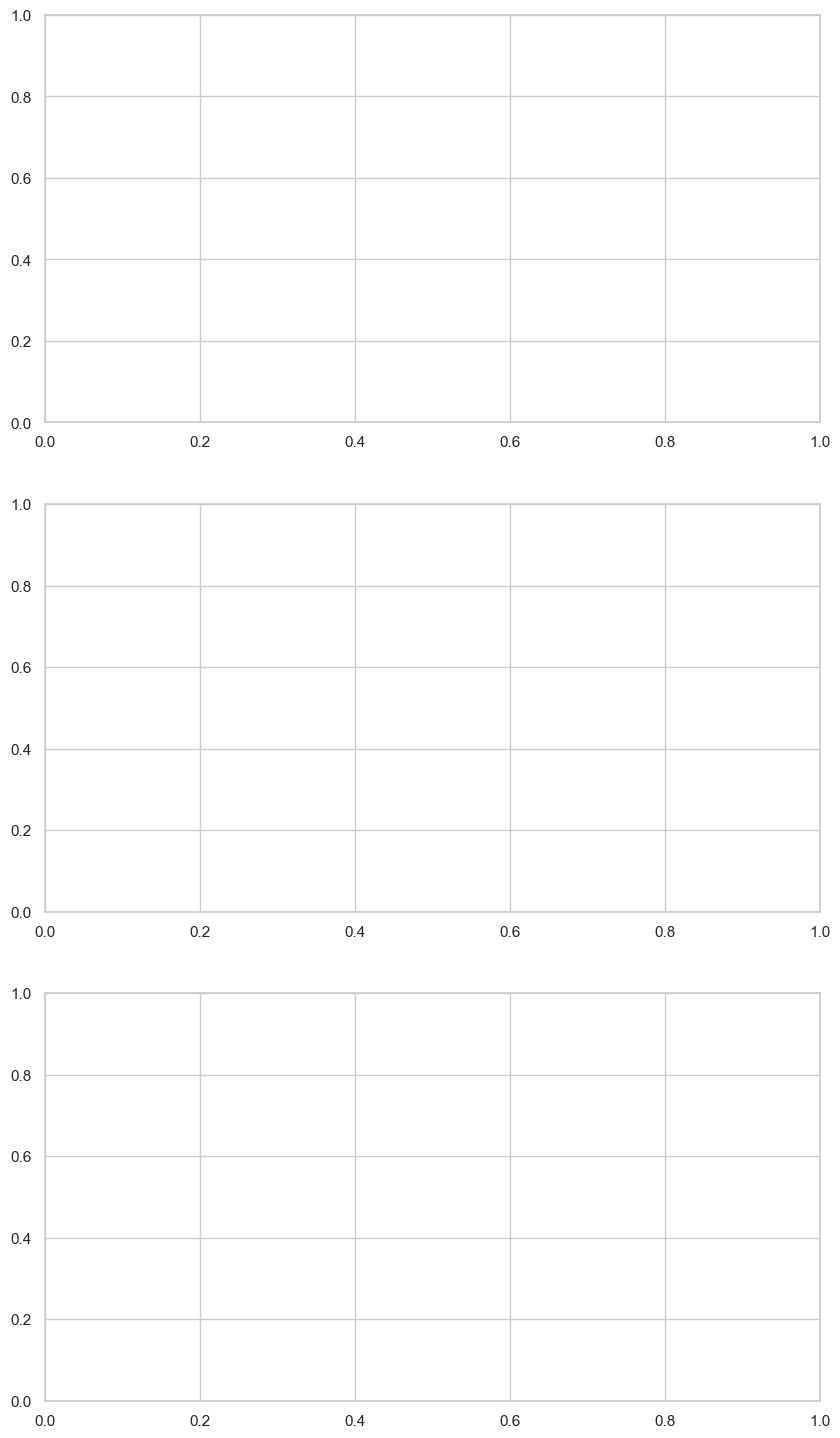

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set plot style
sns.set(style="whitegrid")

# Create a figure for subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# 1. Scatter Plot: Max Diameter vs. Age (Million Years)
sns.scatterplot(
    data=data_q1,
    x="Age (Ma)",  # Updated column name
    y="Max (Diameter) (µm)",  # Updated column name
    #hue="Age_Group",  # Ensure 'Age_Group' is a column in your dataset
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Scatter Plot: Max Diameter vs. Age")
axes[0].set_xlabel("Age (Ma)")
axes[0].set_ylabel("Max Diameter (µm)")

# 2. Boxplot: Distribution of Max Diameter over Age Groups
sns.boxplot(
    data=data_q1,
    x="Age_Group",  # Ensure 'Age_Group' is a valid column
    y="Max (Diameter) (µm)",  # Updated column name
    ax=axes[1]
)
axes[1].set_title("Box Plot: Max Diameter Distribution Across Age Groups")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Max Diameter (µm)")

# 3. Line Plot: Mean Max Diameter Over Time
mean_size_over_time = data_q1.groupby("Age (Ma)")["Max (Diameter) (µm)"].mean().reset_index()
sns.lineplot(
    data=mean_size_over_time,
    x="Age (Ma)",  # Updated column name
    y="Max (Diameter) (µm)",  # Updated column name
    marker="o",
    ax=axes[2]
)
axes[2].set_title("Line Plot: Mean Max Diameter Over Time")
axes[2].set_xlabel("Age (Ma)")
axes[2].set_ylabel("Mean Max Diameter (µm)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()